# 2022 NZMSA Data Science Submission.

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [18]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [19]:
# Description
# Mean - Avg value of data
# std - data standard deviation
# min - data minimum
# 25% - data value from 25th percentile
# 50% - data value from 50th percentile
# 75% - data value from 75th percentile

dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [20]:
# Checks for null-values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


<AxesSubplot:>

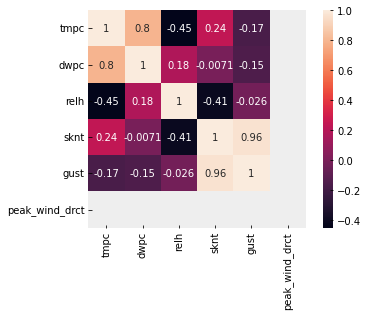

In [21]:
# Correlation plot
# A value near one or negative one may have a pattern wher a(x) = k*b(x)
# a value near 0 means that there is no pattern between a(x) and b(x)
sns.heatmap(dataset.corr(), annot=True, square=True)

C:\Users\Ben\AppData\Local\Temp\ipykernel_12164\2936352485.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


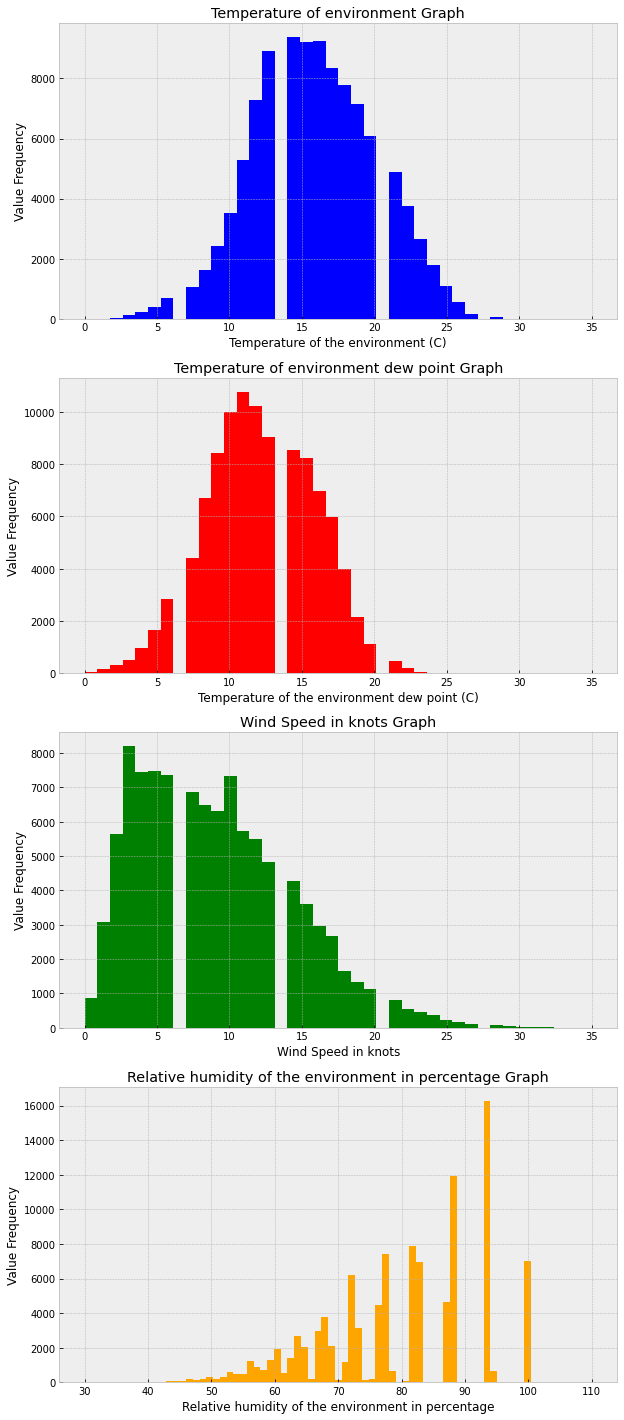

In [22]:
# Graphs
plt.style.use('bmh')
fig1, (tempenv, tempdew, spdk, humid) = plt.subplots(nrows=4,ncols=1, squeeze = True)

tempenv.hist(dataset["tmpc"],40,(0,35) , histtype='bar', color='blue',
         rwidth = 1)
tempenv.set_title("Temperature of environment Graph")
tempenv.set_xlabel("Temperature of the environment (C)")
tempenv.set_ylabel("Value Frequency")


tempdew.hist(dataset["dwpc"],40,(0,35) , histtype='bar', color='red',
         rwidth = 1)
tempdew.set_title("Temperature of environment dew point Graph")
tempdew.set_xlabel("Temperature of the environment dew point (C)")
tempdew.set_ylabel("Value Frequency")


spdk.hist(dataset["sknt"],40,(0,35) , histtype='bar', color='green',
         rwidth = 1)
spdk.set_title("Wind Speed in knots Graph")
spdk.set_xlabel("Wind Speed in knots")
spdk.set_ylabel("Value Frequency")

humid.hist(dataset["relh"],75,(30,110) , histtype='bar', color='orange',
         rwidth = 1)
humid.set_title("Relative humidity of the environment in percentage Graph")
humid.set_xlabel("Relative humidity of the environment in percentage")
humid.set_ylabel("Value Frequency")

fig1.set_size_inches(10,25)
fig1.show()



# Plot Comments:
## Environmental Temperature in celcius - 
* Data is normally distributed.
* Minimum is 2 degrees celcius
* Maximum is 29 degrees celcius
* Mean average is 16 degrees celcius
## Dew temperature in celcius -
* Data is normally distributed.
* Minimum is -2 degrees celcius
* Maximum is 23 degrees celcius
* Mean average is 12 degrees celcius
## Speed in Knots - 
* Data is left skewed
* Minimum is 29 knots
* Maximum is 42 knots
* Median average is 9 knots (Using the median because of the graph skewness)
## Relative humidity of the environment in percentage - 
* Data is right skewed
* Minimum is 29%
* Maximum is 100%
* Median average is 80% (Using the median because of the graph skewness)

# Data Processing

In [23]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html

dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [24]:
# take out useless columns, station, gust, peak wind direction
dataset.drop(columns=[" station","gust", "peak_wind_drct"], inplace=True)
dataset.head()

,valid,tmpc,dwpc,relh,sknt
0,2015-01-01 00:00,21.0,11.0,52.77,15.0
1,2015-01-01 00:30,21.0,10.0,49.37,16.0
2,2015-01-01 01:00,21.0,12.0,56.38,16.0
3,2015-01-01 01:30,21.0,13.0,60.21,16.0
4,2015-01-01 02:00,21.0,12.0,56.38,16.0


In [25]:
# Process data
# replace null values that are found, with values from previous 
# field and check they are all gone
# convert valid into hours from start of recording and loop it back to 0 after each year (8760 hours) for it to work in the model 
dataset.info()
dataset = dataset.fillna(method="pad")
dataset.isnull().sum()


timeToHours = []
currentHours = 0
for i in range(len(dataset["valid"])):
    if currentHours == 8760:
        currrentHours = 0
    else:
        currentHours += 0.5
    timeToHours.append(currentHours)

dataset['valid']= timeToHours

dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   valid   103713 non-null  object 
 1   tmpc    103678 non-null  float64
 2   dwpc    103678 non-null  float64
 3   relh    103593 non-null  float64
 4   sknt    103704 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.0+ MB


,valid,tmpc,dwpc,relh,sknt
0,0.5,21.0,11.0,52.77,15.0
1,1.0,21.0,10.0,49.37,16.0
2,1.5,21.0,12.0,56.38,16.0
3,2.0,21.0,13.0,60.21,16.0
4,2.5,21.0,12.0,56.38,16.0


In [26]:
from sklearn.model_selection import train_test_split

# create the training and testing data
X_train, X_test, y_train, y_test = train_test_split( dataset[["valid"]], dataset[["tmpc","dwpc","relh","sknt"]], test_size=0.2)

X_train.info()
X_test.info()
y_train.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82970 entries, 60655 to 79173
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   valid   82970 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20743 entries, 11336 to 17335
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   valid   20743 non-null  float64
dtypes: float64(1)
memory usage: 324.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 82970 entries, 60655 to 79173
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    82970 non-null  float64
 1   dwpc    82970 non-null  float64
 2   relh    82970 non-null  float64
 3   sknt    82970 non-null  float64
dtypes: float64(4)
memory usage: 3.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20743 entries, 11336 to 17335
Data columns (tota

# Comments on dataframe changes
* we removed columns, station, gust, peak wind direction, as these were contained mostly useless values or were irrelevant.
* We replaced the valid column containing the date with hours so the model could be fit and scored.
* Null values were replaced with the preceeding value, otherwise the dataset could not be trained on.
* The training and testing data was split so that the model is not trained and tested on the same dataset

# Data Modelling

In [27]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

from sklearn.neighbors import KNeighborsRegressor


In [52]:
# Fitting the model
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train,y_train)
# Model Score
model.score(X_test,y_test)

-0.10060245349344124

In [55]:
# creating the next month dataframe, from the last hour
# a month is 730 hours. so 1460 is the range and start from initial hours
dataset.tail
monthDataframe = []
currentHours = 8054
for i in range(1536):
    if currentHours == 8760:
        currrentHours = 0
    else:
        currentHours += 0.5 
    monthDataframe.append(currentHours)

monthDataframe_df = pd.DataFrame(monthDataframe, columns=["valid"])
prediction = model.predict(monthDataframe_df)
prediction_df = pd.DataFrame(prediction, columns = ["tmpc","dwpc","relh","sknt"])
prediction_df.insert(0, "valid", monthDataframe_df)
prediction_df.head

<bound method NDFrame.head of        valid       tmpc       dwpc       relh       sknt
0     8054.5  14.333333   8.000000  65.720000  10.666667
1     8055.0  15.000000   8.333333  64.396667  10.333333
2     8055.5  16.000000   8.333333  60.480000  11.000000
3     8056.0  16.666667   8.000000  56.746667  12.333333
4     8056.5  16.666667   8.000000  56.746667  12.333333
...      ...        ...        ...        ...        ...
1531  8760.0  14.000000  12.000000  88.326667   4.666667
1532  8760.0  14.000000  12.000000  88.326667   4.666667
1533  8760.0  14.000000  12.000000  88.326667   4.666667
1534  8760.0  14.000000  12.000000  88.326667   4.666667
1535  8760.0  14.000000  12.000000  88.326667   4.666667

[1536 rows x 5 columns]>

C:\Users\Ben\AppData\Local\Temp\ipykernel_12164\2573154519.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


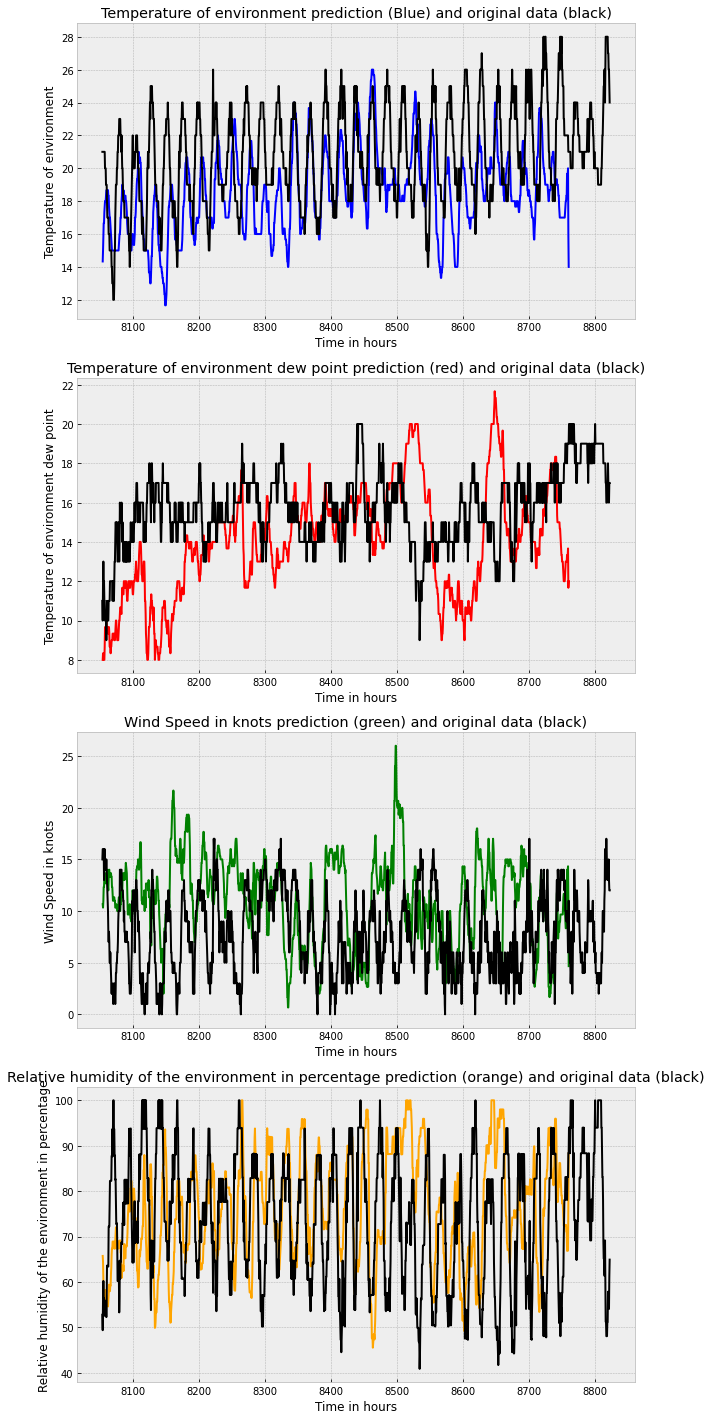

In [56]:
# Plotting our predictions.
# this shows the predictions over a month.
plt.style.use('bmh')
fig1, (tempenv, tempdew, spdk, humid) = plt.subplots(nrows=4,ncols=1, squeeze = True)


# Plotting each prediction.
tempenv.plot(prediction_df["valid"],prediction_df["tmpc"] , color='blue')
tempenv.set_title("Temperature of environment prediction (Blue) and original data (black)")
tempenv.set_xlabel("Time in hours")
tempenv.set_ylabel("Temperature of environment")
tempenv.plot(np.linspace(8054,8822,1536)
,dataset["tmpc"].iloc[:1536] , color='black')

tempdew.plot(prediction_df["valid"],prediction_df["dwpc"] ,  color='red')
tempdew.set_title("Temperature of environment dew point prediction (red) and original data (black)")
tempdew.set_xlabel("Time in hours")
tempdew.set_ylabel("Temperature of environment dew point")
tempdew.plot(np.linspace(8054,8822,1536)
,dataset["dwpc"].iloc[:1536] , color='black')

spdk.plot(prediction_df["valid"],prediction_df["sknt"], color='green')
spdk.set_title("Wind Speed in knots prediction (green) and original data (black)")
spdk.set_xlabel("Time in hours")
spdk.set_ylabel("Wind Speed in knots")
spdk.plot(np.linspace(8054,8822,1536)
,dataset["sknt"].iloc[:1536] , color='black')

humid.plot(prediction_df["valid"],prediction_df["relh"], color='orange')
humid.set_title("Relative humidity of the environment in percentage prediction (orange) and original data (black)")
humid.set_xlabel("Time in hours")
humid.set_ylabel("Relative humidity of the environment in percentage")
humid.plot(np.linspace(8054,8822,1536)
,dataset["relh"].iloc[:1536] , color='black')

fig1.set_size_inches(10,25)
fig1.show()

# Conclusion
* Comment on your model performance.
* Anything interesting about the data analysis.

<p> The first steps taken were to import the dataset and plot interesting data points from the initial data</p>
<p> Following this the dataset was processed to remove invalid values, and the date/time data column was changed into time in hours from the start, as datapoints were taken every 30 minutes.</p>
<p> Additionally the new column for time was changed to loop the data back to a time in hours of 0 after a year had passed (8760 hours).</p>
<p> The K-Nearest neighbours was used for this analysis, which would allow for an accurate prediction that would model the periodic nature of the data.</p>
<p> model which was used ended up yielding an accuracy of -0.1006, I suspect this unusually low due to the way the data was processed, where the time was looped every year.</p> 
<p> Despite the low reading for accuracy, the model appears to fit each data column relatively well, as the predictions seem to model the features present in the data</p>